In [7]:
import pandas as pd
import seaborn as sns
sns.set(style="ticks")
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [11]:
df=pd.read_excel("Credi_Card_Fraud.xlsx")
df.head()

,Card_ID,Limit,Year,Month,Date,Time,Origin,Transaction,Transaction_Type,Amount,Type
0,1,500000,2016,Jun,26,19,"Bangalore, India","Bangalore, India",POS,25000,Normal
1,1,500000,2016,Oct,20,18,"Bangalore, India","Bangalore, India",POS,300,Normal
2,1,500000,2016,Jul,15,7,"Bangalore, India","London, UK",POS,45000,Normal
3,1,500000,2016,Dec,17,15,"Bangalore, India","London, UK",POS,670,Normal
4,1,500000,2016,Sep,7,17,"Bangalore, India","Bangalore, India",POS,4543,Normal


# 1.Explore the data

## check info

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106 entries, 0 to 105
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Card_ID           106 non-null    int64 
 1   Limit             106 non-null    int64 
 2   Year              106 non-null    int64 
 3   Month             106 non-null    object
 4   Date              106 non-null    int64 
 5   Time              106 non-null    int64 
 6   Origin            106 non-null    object
 7   Transaction       106 non-null    object
 8   Transaction_Type  106 non-null    object
 9   Amount            106 non-null    int64 
 10  Type              106 non-null    object
dtypes: int64(6), object(5)
memory usage: 9.2+ KB


In [17]:
df.drop('Card_ID',axis=1,inplace=True)

In [19]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Limit,106.0,254481.132075,166861.689582,25000.0,100000.00,225000.0,350000.00,500000.0
Year,106.0,2016.000000,0.000000,2016.0,2016.00,2016.0,2016.00,2016.0
Date,106.0,15.009434,8.462236,1.0,8.00,15.0,20.75,31.0
Time,106.0,12.669811,7.077424,1.0,7.00,12.5,19.00,24.0
Amount,106.0,17255.301887,34962.028891,50.0,894.25,4000.0,12000.00,175600.0


In [21]:
df.describe(include='O').T

,count,unique,top,freq
Month,106,12,Oct,15
Origin,106,7,"Mumbai, India",32
Transaction,106,17,"Mumbai, India",27
Transaction_Type,106,2,POS,73
Type,106,2,Normal,72


In [23]:
#Line Plot

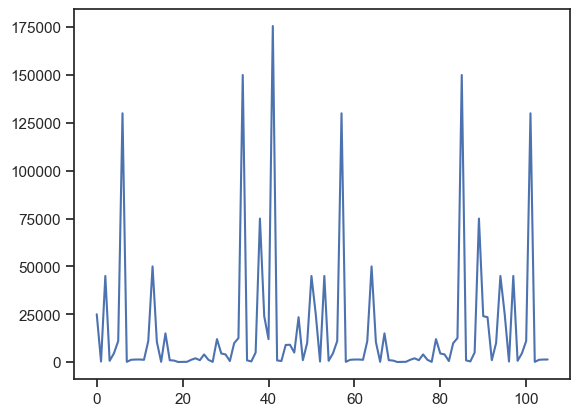

In [25]:
plt.plot(df['Amount'])
plt.show()

In [27]:
#Bar Plot

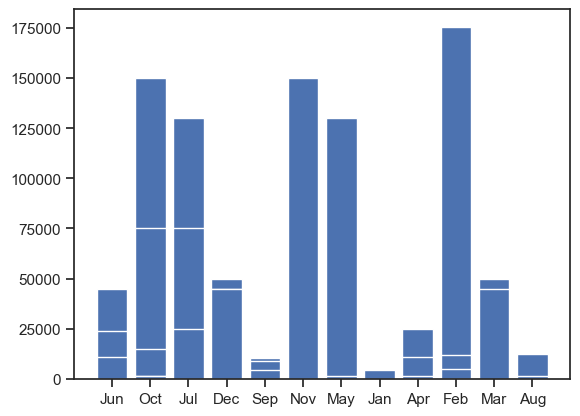

In [29]:
plt.bar(df['Month'],df['Amount'])
plt.show()

In [30]:
#Scatter Plot

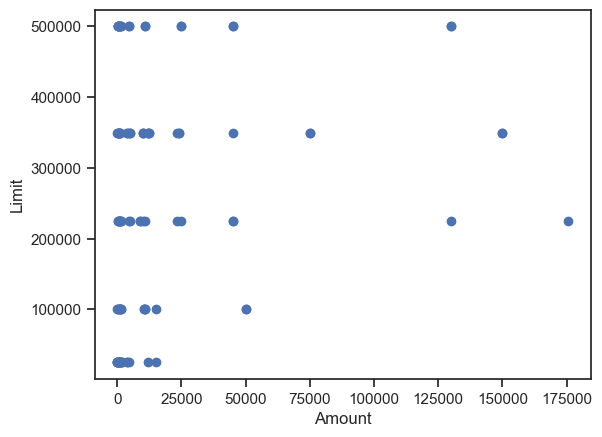

In [31]:
plt.scatter(df['Amount'],df['Limit'])
plt.xlabel('Amount')
plt.ylabel('Limit')
plt.show()

In [34]:
#Hist Plot

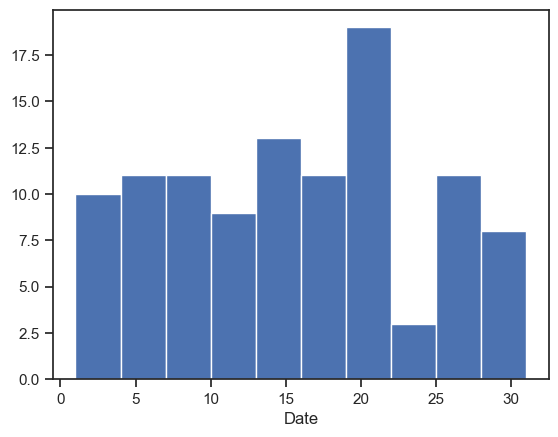

In [37]:
plt.hist(df['Date'])
plt.xlabel('Date')
plt.show()

In [38]:
#Box Plot

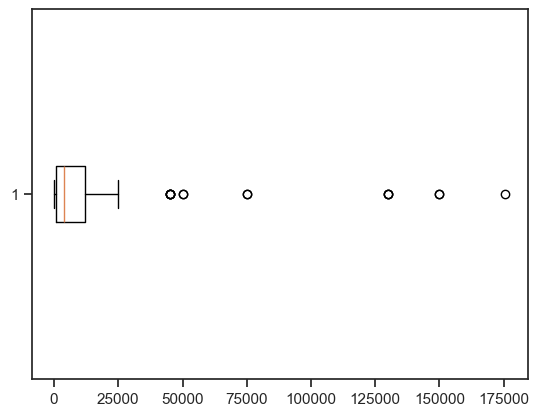

In [41]:
plt.boxplot(df['Amount'],vert=False)
plt.show()


In [42]:
#Pie Plot

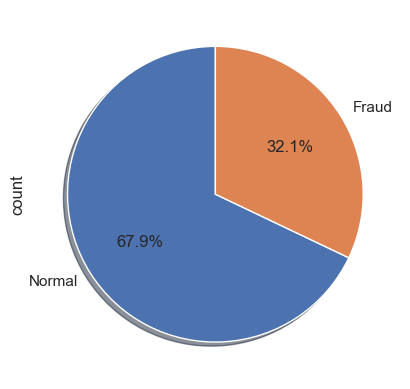

In [45]:
df['Type'].value_counts().plot(kind='pie',autopct='%1.1f%%',shadow=True,startangle=90)
plt.show()

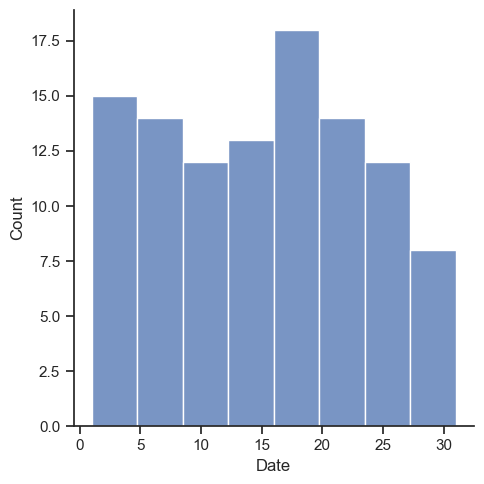

In [47]:
sns.displot(df['Date'])
plt.show()

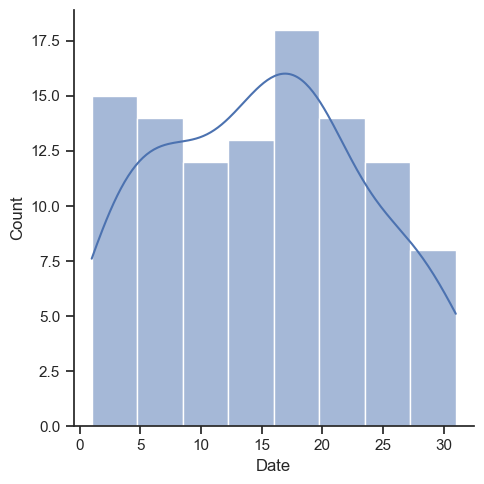

In [48]:
## KDE IS KERNEL DENSITY ESTIMATOR
### GIVES THE DISTRIBUTION
### Y axis is the proportion of data and not count inside the kde line.
sns.displot(df['Date'],kde=True)
plt.show()

In [49]:
##Categorical plots in Seaborn
#Countplot
#Countplot displays the number of observations in each categorical level using the bars
#It is Similar to bar plot
#The count plots can be plotted horizontally or vertically

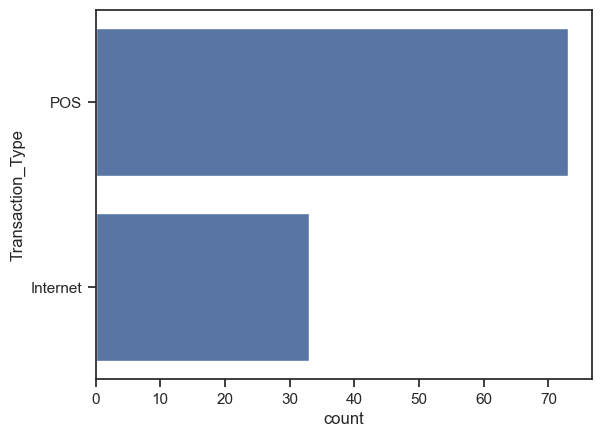

In [51]:
sns.countplot(df['Transaction_Type'])
plt.show()

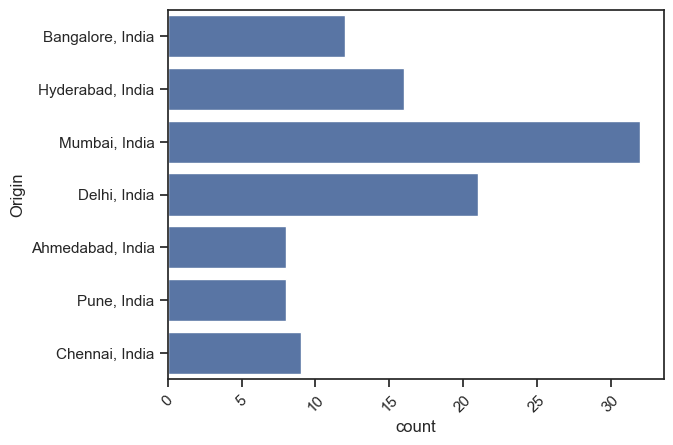

In [53]:
sns.countplot(df['Origin'])
plt.xticks(rotation=45)
plt.show()

In [55]:
#Catplot
#Catplot helps to visualise the categorical data much efficiently
#It Can be used for analysis between categorical features and a numerical feature
#Supports multiple functions that show the relationship between a numerical and one or more categorical variables
#Can be used to plot multiple plots like count, box, strip, swarm by changing the ‘kind’ argument

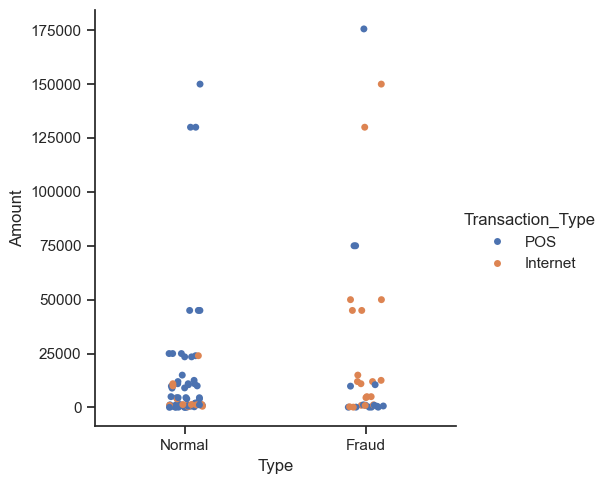

In [57]:
## example:1 
## Strip plot
## Use catplot and add hue 
sns.catplot(x="Type", y="Amount", hue="Transaction_Type",
            kind="strip", data=df)
plt.show()

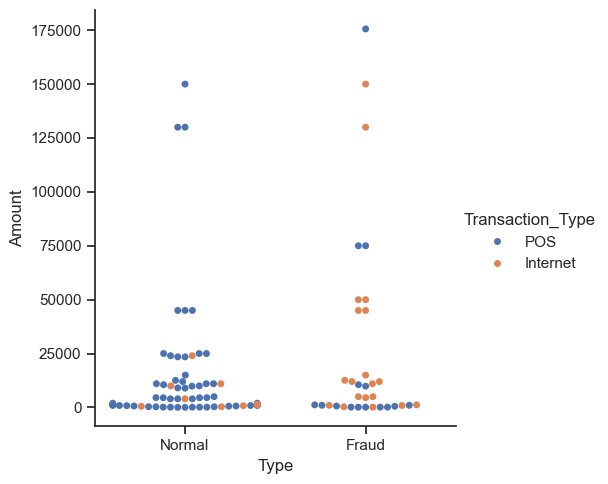

In [58]:
## example:2 
## Swarm plot
## Use catplot and add hue 
sns.catplot(x="Type", y="Amount", hue="Transaction_Type",
            kind="swarm", data=df)
plt.show()

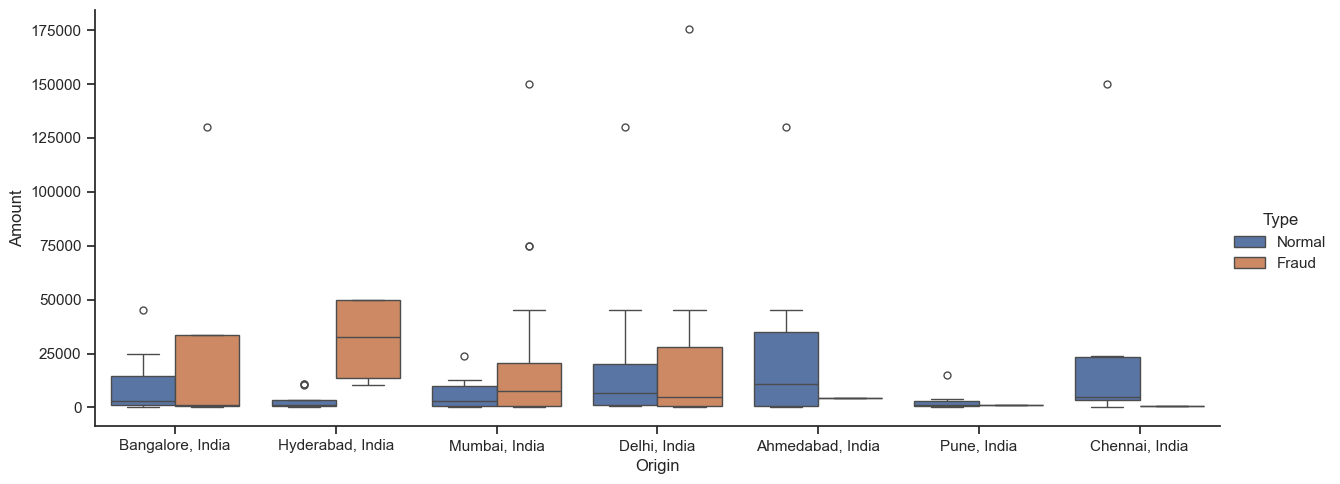

In [61]:
## example:2
sns.catplot(x="Origin", y="Amount", hue="Type", kind="box", data = df, aspect=20/8)
plt.show()

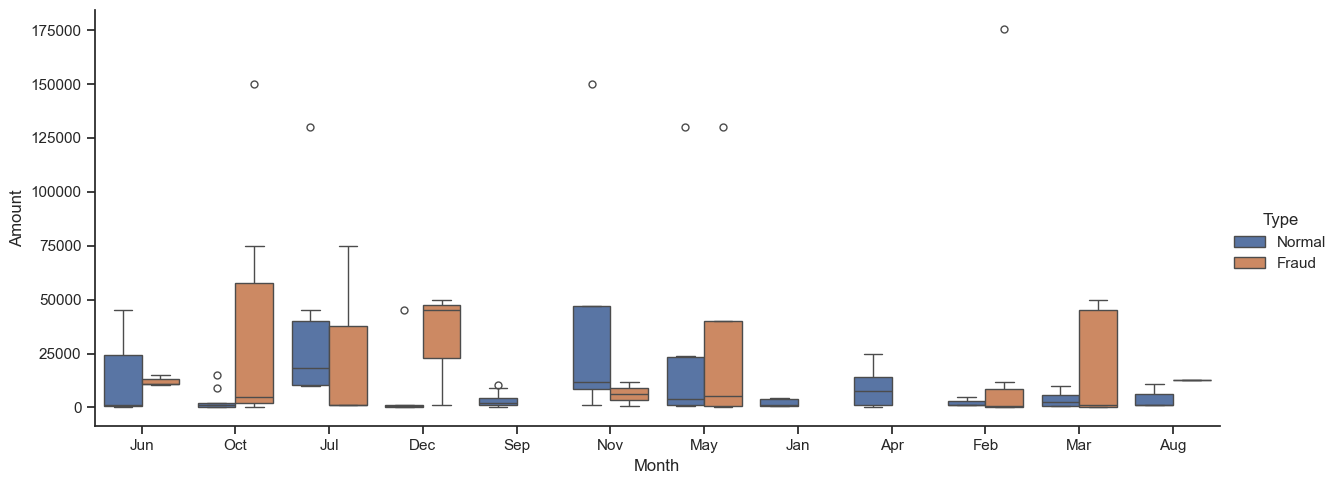

In [62]:
## example:3
sns.catplot(x="Month", y="Amount", hue="Type", kind="box", data=df, aspect=20/8)
plt.show()

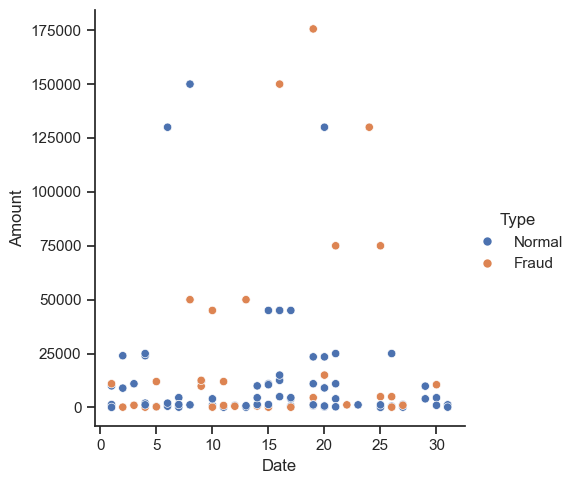

In [63]:
## example:1
sns.relplot(x="Date", y="Amount", hue="Type", data=df)
plt.show()

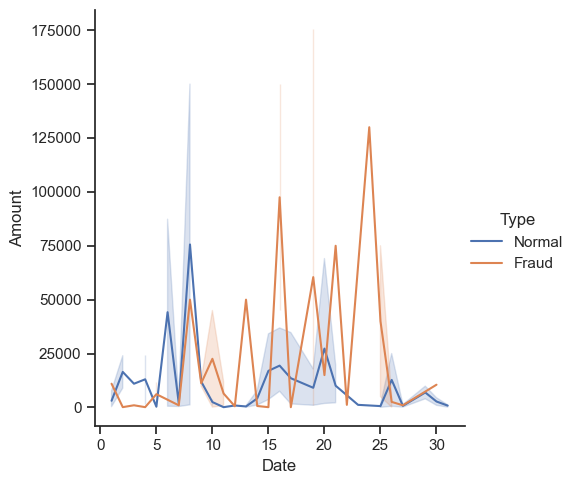

In [65]:
## example:2
sns.relplot(x="Date", y="Amount", hue="Type", data=df, kind='line')
plt.show()

In [66]:
#1. Matrix plots
#1.1 Heatmap:
#Pandas corr() method - generates correlation matrix, sns.heatmap() - helps to visualize correlation values

In [67]:
df = pd.read_excel('Credi_Card_Fraud.xlsx')
df.head()


,Card_ID,Limit,Year,Month,Date,Time,Origin,Transaction,Transaction_Type,Amount,Type
0,1,500000,2016,Jun,26,19,"Bangalore, India","Bangalore, India",POS,25000,Normal
1,1,500000,2016,Oct,20,18,"Bangalore, India","Bangalore, India",POS,300,Normal
2,1,500000,2016,Jul,15,7,"Bangalore, India","London, UK",POS,45000,Normal
3,1,500000,2016,Dec,17,15,"Bangalore, India","London, UK",POS,670,Normal
4,1,500000,2016,Sep,7,17,"Bangalore, India","Bangalore, India",POS,4543,Normal


In [81]:
corr_df = df.drop('Year',axis=1).corr()
corr_df

ValueError: could not convert string to float: 'Jun'

In [77]:
## Visualizing the correlation values using Heatmap
sns.heatmap(corr_df,annot=True,cmap='viridis')
plt.show()

NameError: name 'corr_df' is not defined

In [83]:
d = {'color': ['green', 'red']}
ax = sns.FacetGrid(df, col="Type", row="Transaction_Type",size=4, hue='Type', hue_kws=d)
ax.map_dataframe(sns.countplot, x='Limit')
plt.show()

TypeError: FacetGrid.__init__() got an unexpected keyword argument 'size'

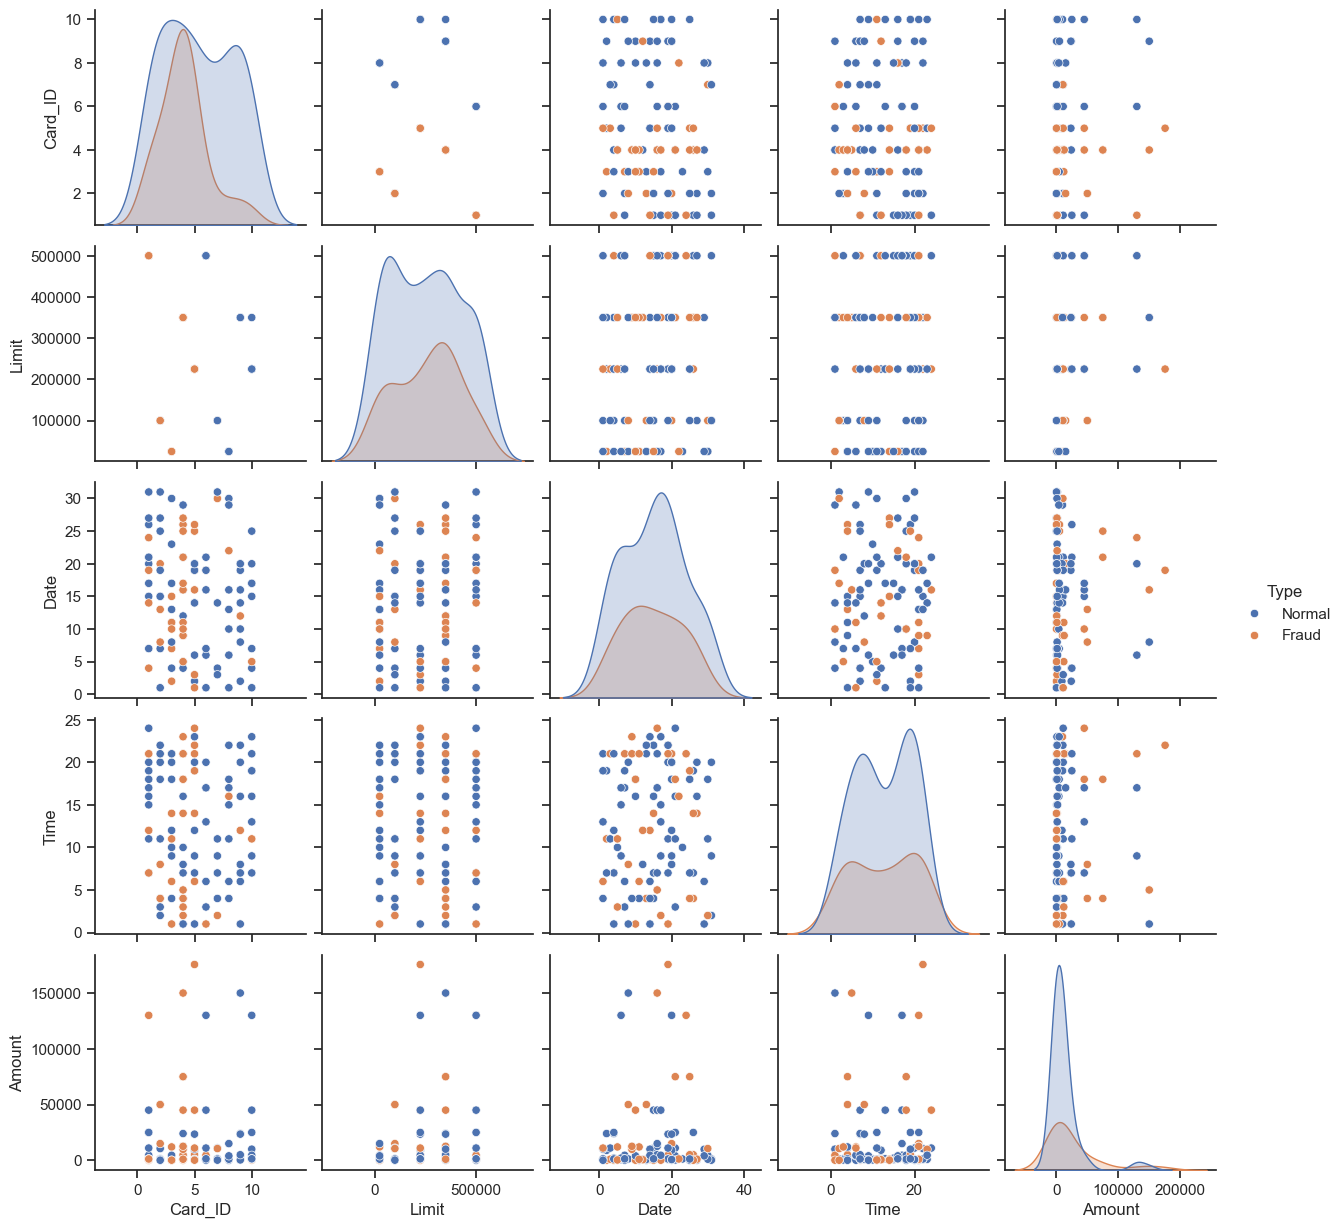

In [86]:
sns.pairplot(df.drop(["Year"], axis=1), hue='Type', diag_kind='kde')
plt.show()